In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import category_encoders as ce
from imblearn.over_sampling import SMOTE, SVMSMOTE
from sklearn.model_selection import train_test_split

In [184]:
df_train = pd.read_csv('churn-bigml-80.csv')
df_train

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [185]:
df_test = pd.read_csv('churn-bigml-20.csv')
df_test

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


## Label

Churn : từ bỏ dịch vụ

trong đó False có nghĩa là không rời bỏ dịch vụ

và True có nghĩa là rời bỏ dịch vụ

<Axes: ylabel='count'>

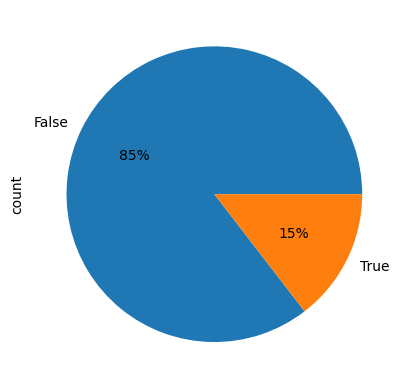

In [186]:
df_train['Churn'].value_counts().plot(kind='pie', autopct='%1.0f%%')

<Axes: ylabel='count'>

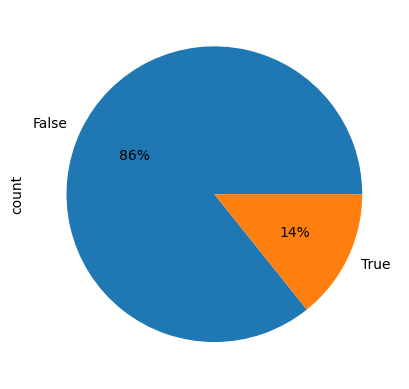

In [187]:
df_test['Churn'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [188]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [189]:
df_train.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [190]:
object_col = [f for f in df_train.columns if df_train.dtypes[f] == 'object']
object_col

['State', 'International plan', 'Voice mail plan']

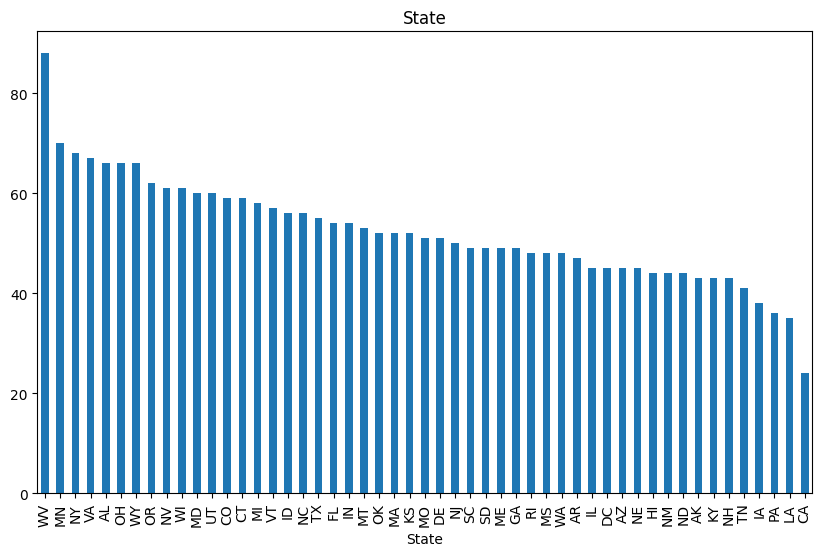

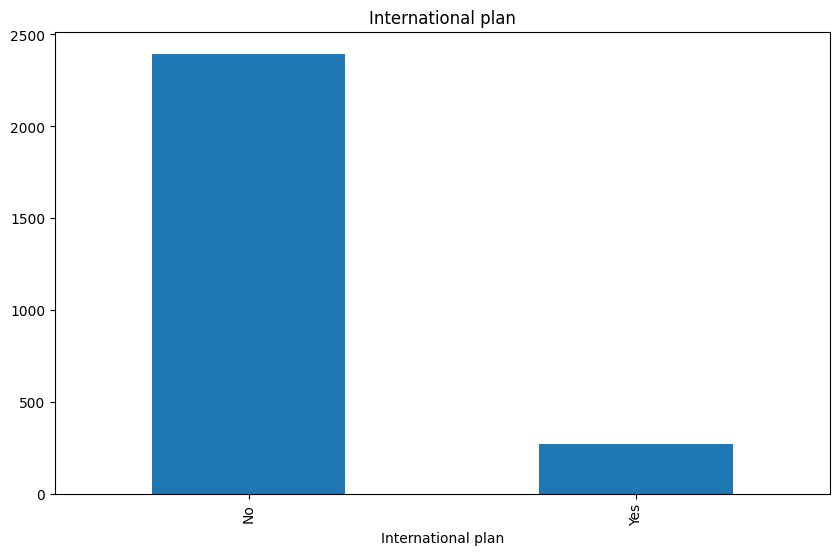

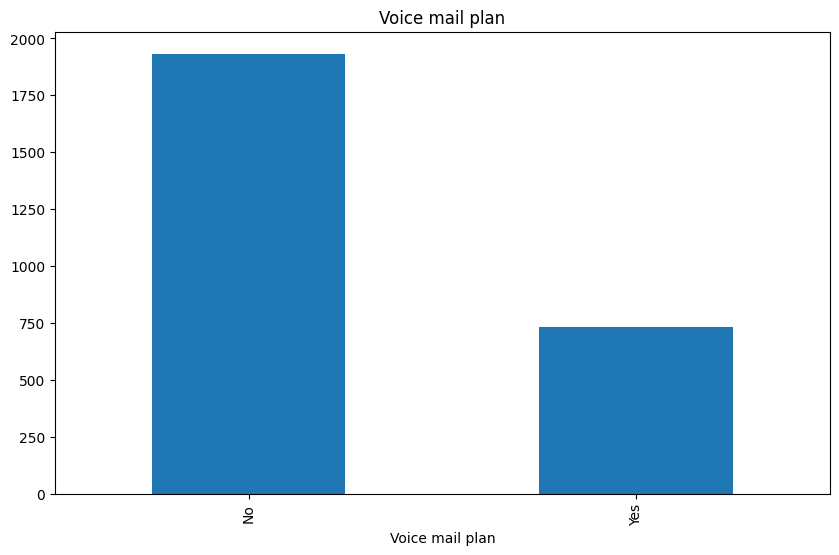

In [191]:
for col in object_col:
    df_train[col].value_counts().plot(kind='bar', figsize=(10, 6))
    plt.title(col)
    plt.show()

In [193]:
df_train['Churn'] = df_train['Churn'].astype(int)
df_train['Churn']

0       0
1       0
2       0
3       0
4       0
       ..
2661    0
2662    0
2663    0
2664    0
2665    0
Name: Churn, Length: 2666, dtype: int64

In [194]:
numeric_col = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
numeric_col

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

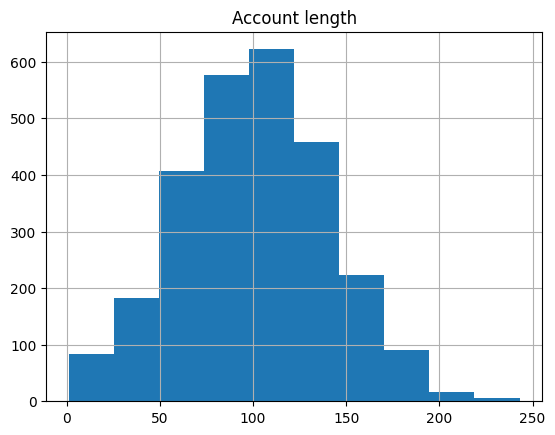

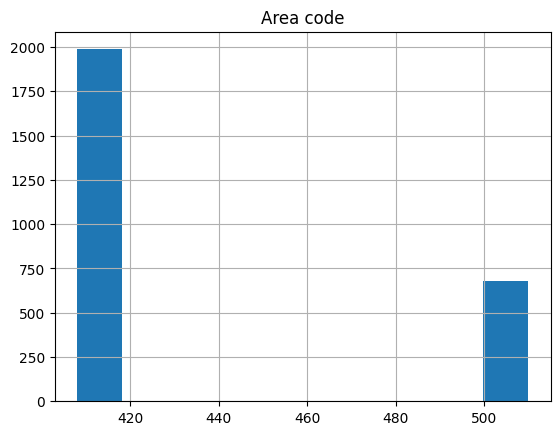

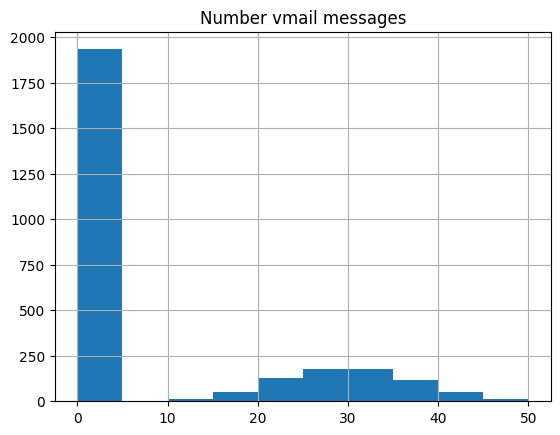

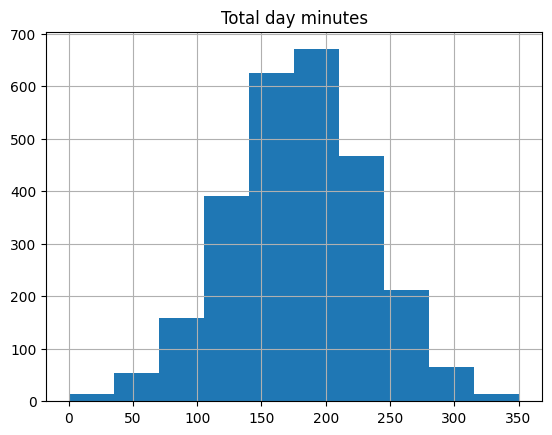

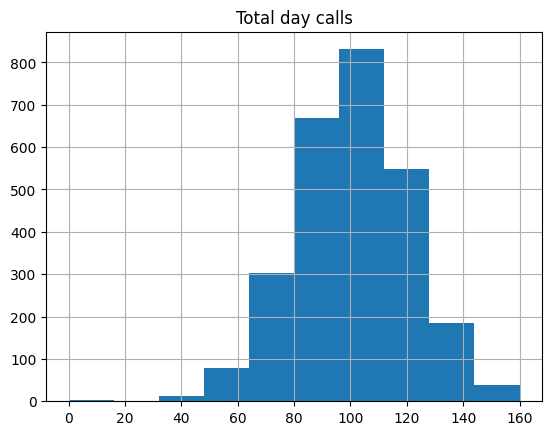

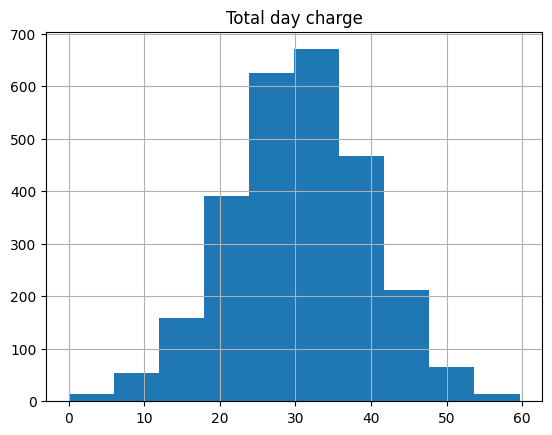

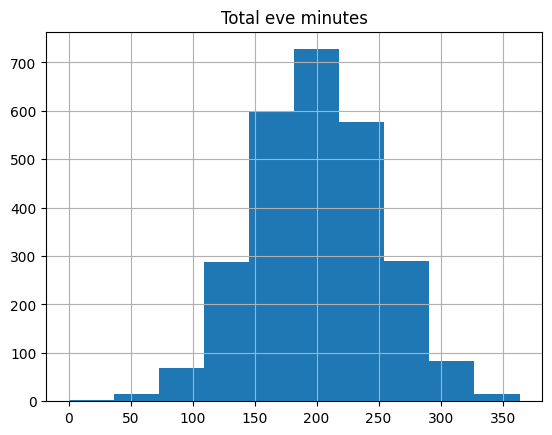

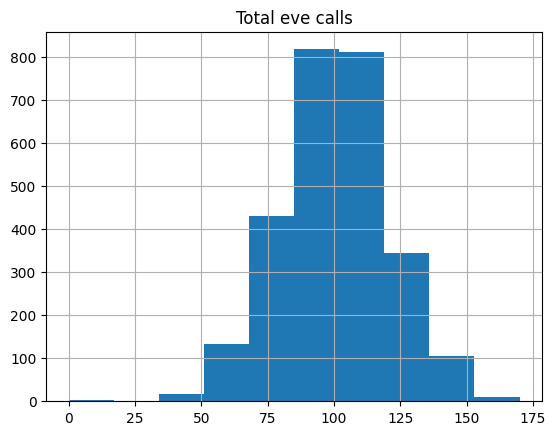

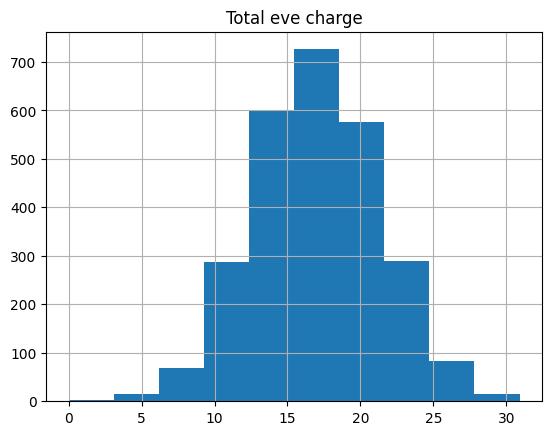

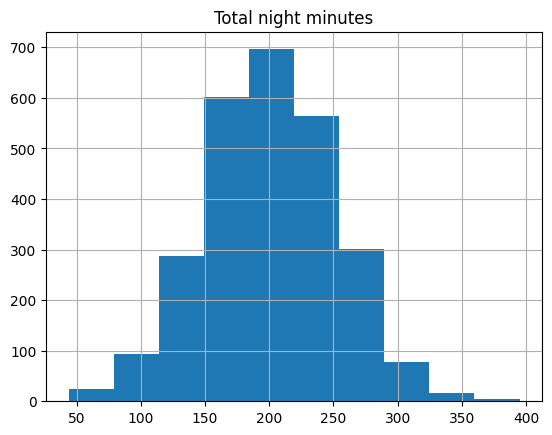

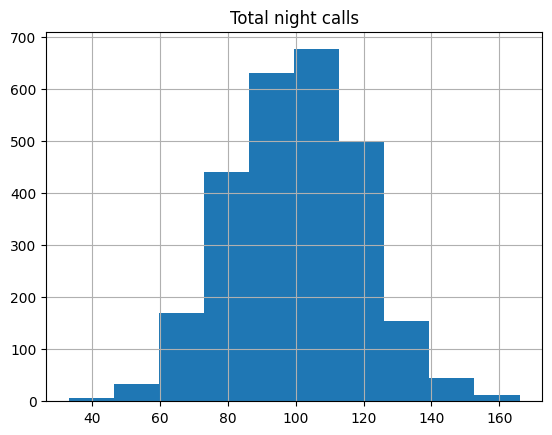

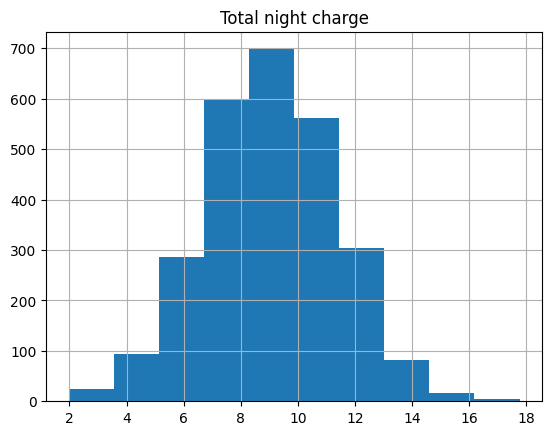

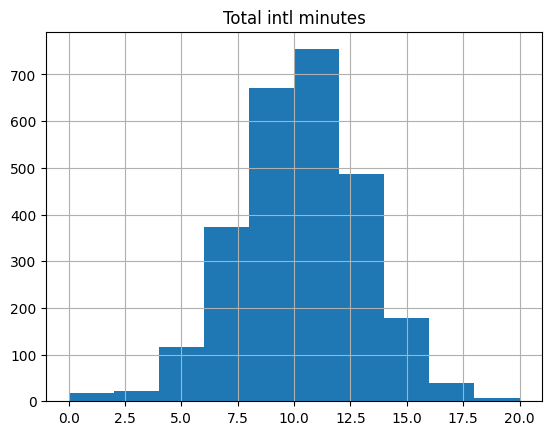

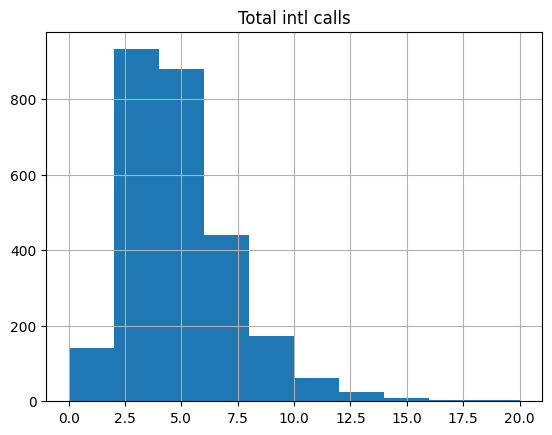

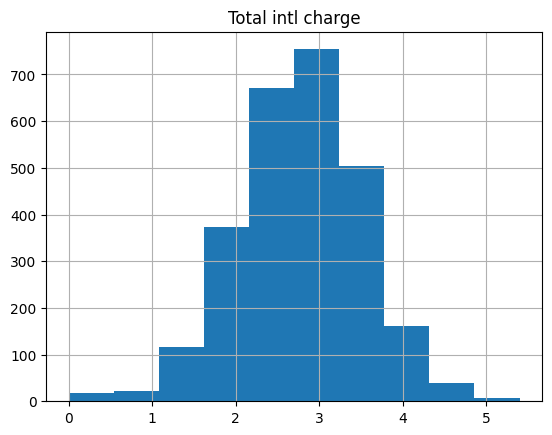

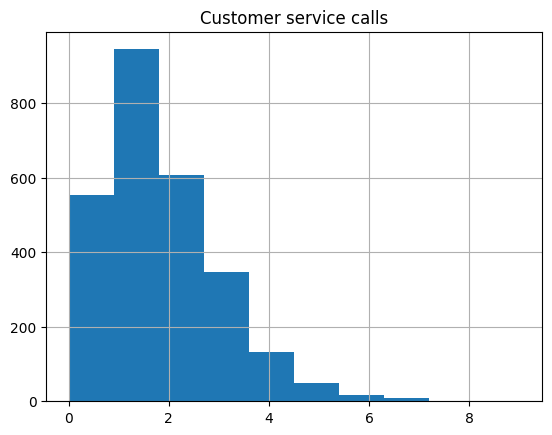

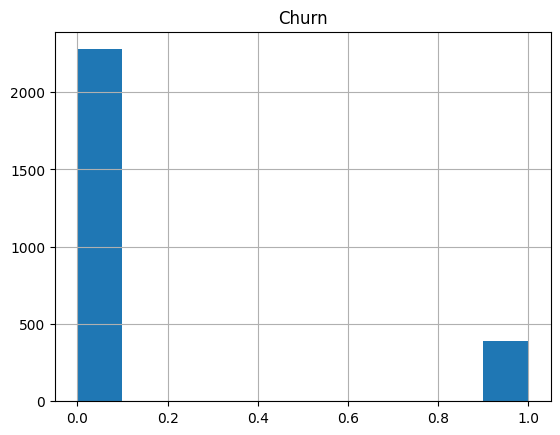

In [195]:
for col in numeric_col:
    df_train[col].hist()
    plt.title(col)
    plt.show()

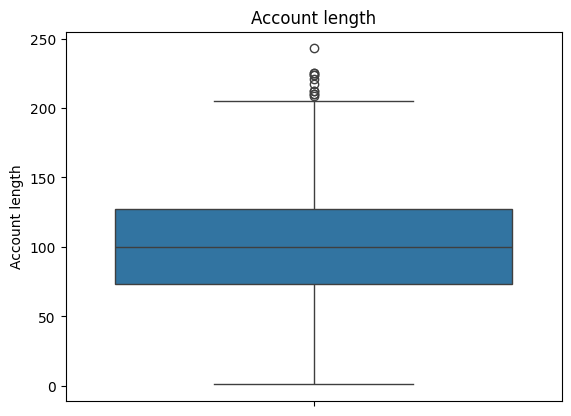

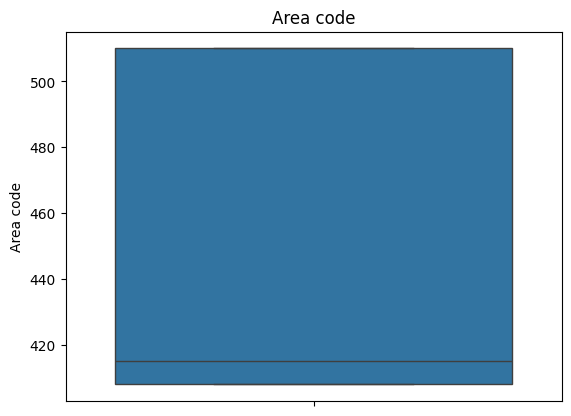

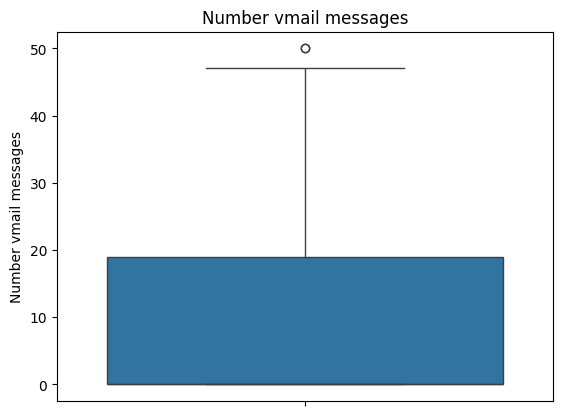

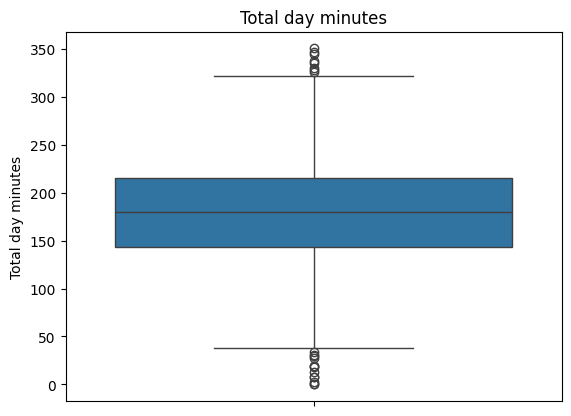

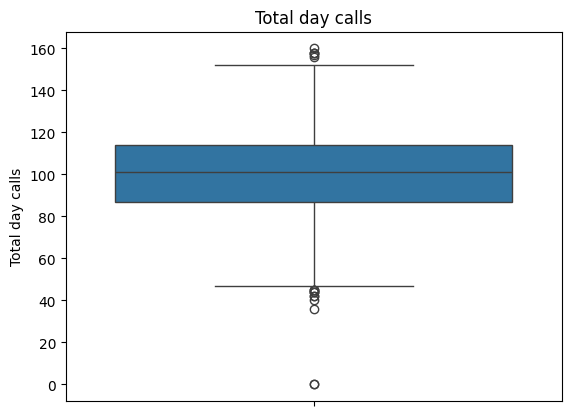

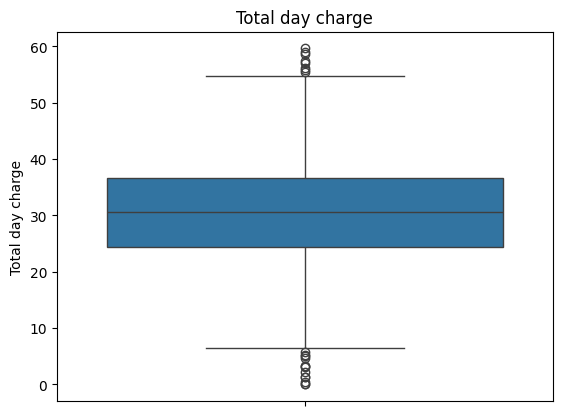

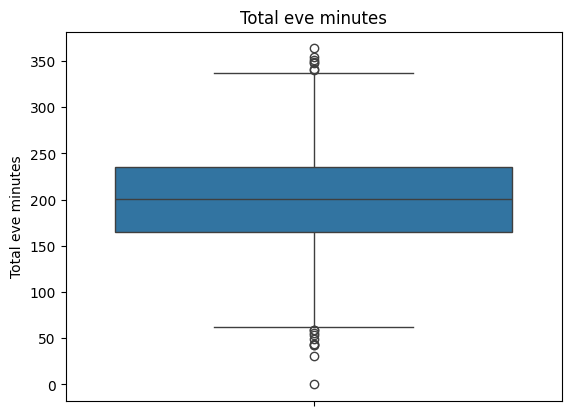

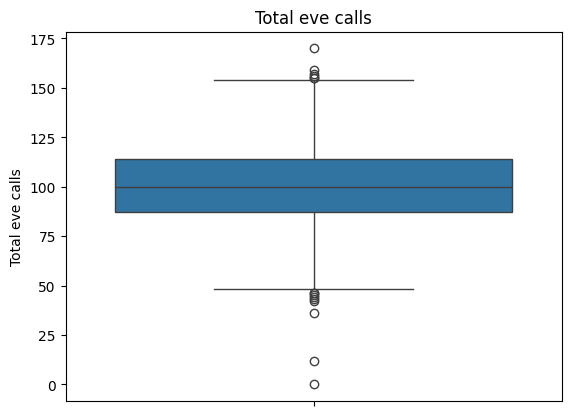

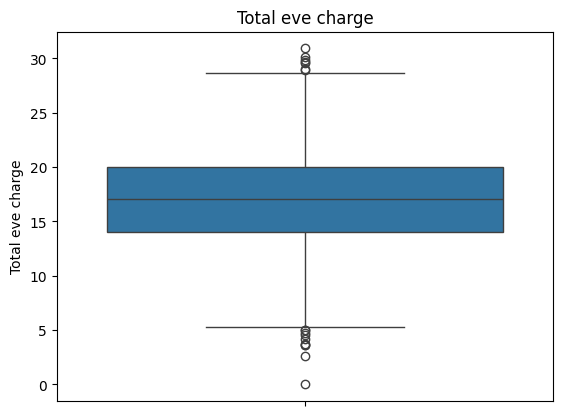

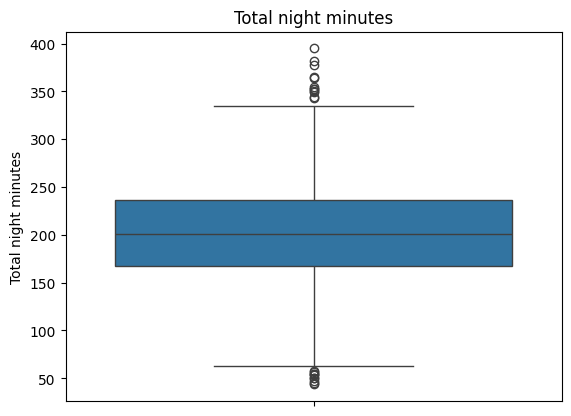

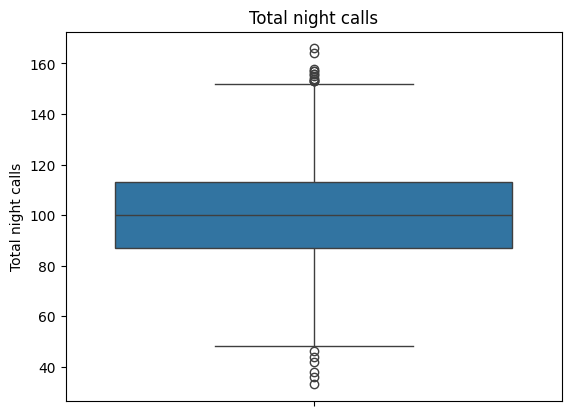

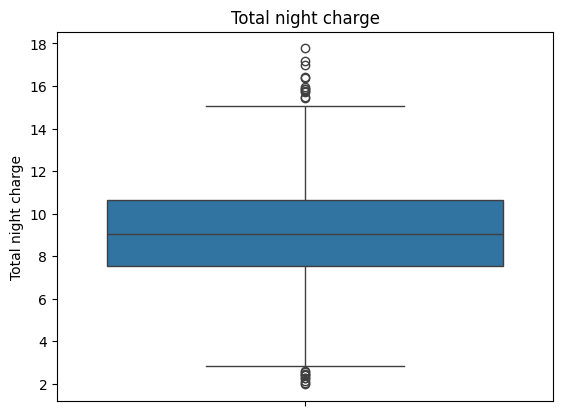

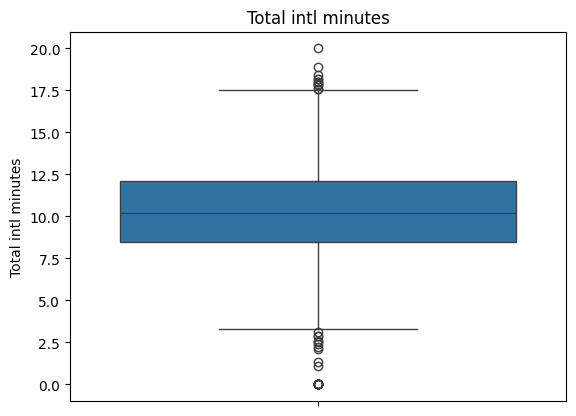

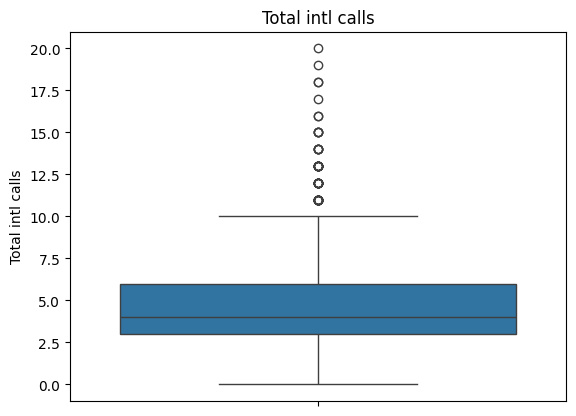

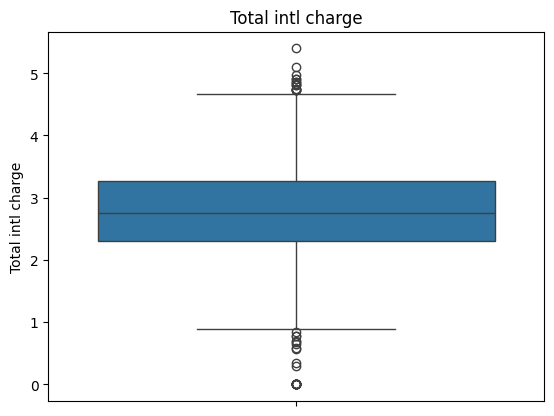

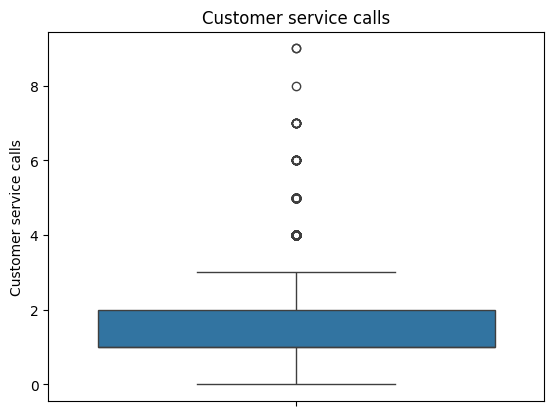

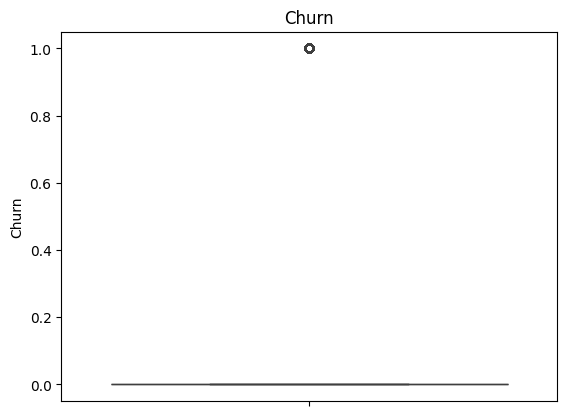

In [196]:
for col in numeric_col:
    sns.boxplot(y=col, data=df_train)
    plt.title(col)
    plt.show()

# Preprosessing data

In [197]:
he = ce.HashingEncoder(cols=['State'])
dataset_hash = he.fit_transform(df_train)
dataset_hash

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Account length,Area code,...,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0,1,0,0,0,0,0,0,128,415,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,0,0,0,1,0,0,0,107,415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,1,0,0,0,0,0,0,137,415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,0,0,0,1,0,0,0,84,408,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,0,0,0,0,1,0,0,0,75,415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0,0,0,0,0,1,0,0,79,415,...,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,0,0,0,0,0,0,1,0,192,415,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,0,0,0,0,0,0,1,0,68,415,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,0,0,1,0,0,0,0,0,28,510,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [198]:
dataset_hash_get_dummies = pd.get_dummies(dataset_hash, drop_first=True)
dataset_hash_get_dummies

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Account length,Area code,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_Yes,Voice mail plan_Yes
0,0,1,0,0,0,0,0,0,128,415,...,244.7,91,11.01,10.0,3,2.70,1,0,False,True
1,0,0,0,0,1,0,0,0,107,415,...,254.4,103,11.45,13.7,3,3.70,1,0,False,True
2,0,1,0,0,0,0,0,0,137,415,...,162.6,104,7.32,12.2,5,3.29,0,0,False,False
3,0,0,0,0,1,0,0,0,84,408,...,196.9,89,8.86,6.6,7,1.78,2,0,True,False
4,0,0,0,0,1,0,0,0,75,415,...,186.9,121,8.41,10.1,3,2.73,3,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0,0,0,0,0,1,0,0,79,415,...,221.4,128,9.96,11.8,5,3.19,2,0,False,False
2662,0,0,0,0,0,0,1,0,192,415,...,279.1,83,12.56,9.9,6,2.67,2,0,False,True
2663,0,0,0,0,0,0,1,0,68,415,...,191.3,123,8.61,9.6,4,2.59,3,0,False,False
2664,0,0,1,0,0,0,0,0,28,510,...,191.9,91,8.64,14.1,6,3.81,2,0,False,False


In [199]:
cor = dataset_hash_get_dummies.corr()
cor.style.background_gradient(cmap='coolwarm')

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_Yes,Voice mail plan_Yes
col_0,1.000000,-0.199280,-0.124878,-0.164213,-0.197385,-0.111441,-0.195484,-0.144111,0.024855,-0.018184,0.027840,0.007383,0.000719,0.007383,0.013942,0.006718,0.013929,0.009167,-0.043255,0.009208,-0.017601,-0.005949,-0.017661,0.013967,-0.038880,0.000113,0.029145
col_1,-0.199280,1.000000,-0.124540,-0.163769,-0.196851,-0.111140,-0.194956,-0.143722,0.001295,-0.033688,0.003512,0.061203,0.004436,0.061205,-0.015544,0.007583,-0.015545,-0.017052,0.009563,-0.017075,0.034745,0.011674,0.034821,0.016397,0.050547,-0.002553,-0.001186
col_2,-0.124878,-0.124540,1.000000,-0.102625,-0.123356,-0.069645,-0.122168,-0.090063,-0.013164,0.005117,-0.020122,-0.027076,-0.012159,-0.027077,0.025256,-0.041473,0.025264,-0.000174,0.038285,-0.000189,-0.005631,0.008722,-0.005647,-0.016108,-0.004468,-0.021812,-0.009934
col_3,-0.164213,-0.163769,-0.102625,1.000000,-0.162212,-0.091583,-0.160650,-0.118431,0.024033,0.028400,-0.010720,-0.002850,0.017435,-0.002845,0.031347,0.016356,0.031360,0.014938,0.001155,0.014926,0.003144,-0.018949,0.003167,0.017363,-0.003730,0.030329,-0.010790
col_4,-0.197385,-0.196851,-0.123356,-0.162212,1.000000,-0.110083,-0.193102,-0.142355,0.003852,0.001936,0.004068,0.020242,-0.000302,0.020242,0.015206,0.016805,0.015220,0.038430,0.007781,0.038423,0.006407,-0.016247,0.006415,-0.022260,0.019262,0.020004,0.007729
col_5,-0.111441,-0.111140,-0.069645,-0.091583,-0.110083,1.000000,-0.109023,-0.080372,-0.026534,-0.013024,-0.000868,-0.042079,0.005007,-0.042081,0.010050,-0.007031,0.010046,-0.010433,0.006374,-0.010422,-0.015406,-0.016861,-0.015437,-0.009474,0.046661,-0.009529,-0.003190
col_6,-0.195484,-0.194956,-0.122168,-0.160650,-0.193102,-0.109023,1.000000,-0.140984,-0.014298,-0.005115,-0.000549,-0.033234,-0.010572,-0.033239,-0.076598,-0.028391,-0.076608,-0.016034,0.005556,-0.016033,0.005078,0.032024,0.005021,0.010280,-0.050096,-0.038425,-0.008412
col_7,-0.144111,-0.143722,-0.090063,-0.118431,-0.142355,-0.080372,-0.140984,1.000000,-0.013888,0.044528,-0.014011,-0.010190,-0.005454,-0.010188,0.013824,0.020522,0.013820,-0.026467,-0.014200,-0.026465,-0.022388,-0.000162,-0.022333,-0.020793,-0.005571,0.019498,-0.011538
Account length,0.024855,0.001295,-0.013164,0.024033,0.003852,-0.026534,-0.014298,-0.013888,1.000000,-0.008620,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455,0.017728,0.024500,0.002448
Area code,-0.018184,-0.033688,0.005117,0.028400,0.001936,-0.013024,-0.005115,0.044528,-0.008620,1.000000,-0.000584,-0.023134,-0.009629,-0.023130,0.000679,-0.018602,0.000707,-0.003353,0.011455,-0.003382,-0.013418,-0.027423,-0.013534,0.034442,0.001019,0.047099,0.007180


In [204]:
dataset_hash_get_dummies_drop_corr = dataset_hash_get_dummies.drop(columns=['Total day charge', 'Voice mail plan_Yes', 'Total eve charge', 'Total night minutes', 'Total intl minutes'], axis=1)
dataset_hash_get_dummies_drop_corr['International plan_Yes'] = dataset_hash_get_dummies_drop_corr['International plan_Yes'].astype(int)

In [205]:
dataset_hash_get_dummies_drop_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   col_0                   2666 non-null   int64  
 1   col_1                   2666 non-null   int64  
 2   col_2                   2666 non-null   int64  
 3   col_3                   2666 non-null   int64  
 4   col_4                   2666 non-null   int64  
 5   col_5                   2666 non-null   int64  
 6   col_6                   2666 non-null   int64  
 7   col_7                   2666 non-null   int64  
 8   Account length          2666 non-null   int64  
 9   Area code               2666 non-null   int64  
 10  Number vmail messages   2666 non-null   int64  
 11  Total day minutes       2666 non-null   float64
 12  Total day calls         2666 non-null   int64  
 13  Total eve minutes       2666 non-null   float64
 14  Total eve calls         2666 non-null   

In [207]:
X = dataset_hash_get_dummies_drop_corr.drop(["Churn"],axis=1)
y = dataset_hash_get_dummies_drop_corr['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

In [211]:
# XGBoost

import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train, y_train)


y_pred = model_xgb.predict(X_test)
# In bao cao ket qua
print(classification_report( y_test, y_pred))

# In ra confusion matrix
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       455
           1       0.95      0.76      0.85        79

    accuracy                           0.96       534
   macro avg       0.96      0.88      0.91       534
weighted avg       0.96      0.96      0.96       534



array([[452,   3],
       [ 19,  60]])